### Imports

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

#### Load Data

In [2]:
# load un-analyzed data here from csv
unanalyzed_data = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

# The Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv file will be our input dataset
# We will use the TextBlob library to analyze the sentiment of the reviews
# Initially only the Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv file should be in the folder

#### Subjectivity and Polarity determination function from TextBlob to prepare the data

In [3]:
# subjectivity is how much of a personal opinion it is
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [4]:
# polarity is how positive or negative it is
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#### Add subjectivity and polarity to the dataframe

In [5]:
# create two new columns in the dataset --- incomplete
unanalyzed_data['Subjectivity'] = unanalyzed_data['reviews.text'].apply(getSubjectivity)
unanalyzed_data['Polarity'] = unanalyzed_data['reviews.text'].apply(getPolarity)
unanalyzed_data.head(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Subjectivity,Polarity
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...,0.348718,-0.108974
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...,0.844444,0.277778
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...,0.525000,0.165625
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...,0.544528,0.240497
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...,0.568750,0.468750


#### Function to determine sentiment based on polarity

In [6]:
def getSentiment(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#### Add sentiment to the dataframe

In [7]:
# create a new sentiment column in the dataset
unanalyzed_data['Sentiment'] = unanalyzed_data['Polarity'].apply(getSentiment)

# after this, our dataset is analyzed and ready to be used for training
# at this point, we have a prepared dataset on which we can train our model

In [8]:
# make a copy of the dataset calling it analyzed_data - because it is analyzed
# analyzed_data = unanalyzed_data.copy()

# ---------- above code line should be executed only ----------

# ---------- below code lines are just bringing the directly analyzed data using readcsv for further use ----------

# load analyzed data here from csv
analyzed_data = pd.read_csv('analyzed_data_textblob3.csv')

# Either make a copy and store it in a new variable analyzed_data 
# OR
# directly load the analyzed data from the csv file after saving it in the previous step

In [9]:
# changing the review_analysis column name to sentiment
analyzed_data.rename(columns={'review_analysis':'Sentiment'}, inplace=True)

# changing the polarity column name to Polarity and subjectivity column name to Subjectivity
analyzed_data.rename(columns={'polarity':'Polarity'}, inplace=True)
analyzed_data.rename(columns={'subjectivity':'Subjectivity'}, inplace=True)

# show the first 5 rows of the dataset
analyzed_data.head(5)

# This cell should only be executed if we have loaded the analyzed data from the csv file in the previous step. The new loaded data had different column names, so we changed them to the names we used in the previous steps.

,Unnamed: 0,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Subjectivity,Polarity,Sentiment
0,0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",0.358333,-0.450000,Negative
1,1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",0.383333,-0.333333,Negative
2,2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",1.000000,0.800000,Positive
3,3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",0.500000,0.500000,Positive
4,4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",0.423333,0.245000,Positive


In [10]:
# printing details of the dataset
print('The shape of the dataset is: ', analyzed_data.shape)
print('The columns of the dataset are: ', analyzed_data.columns)

The shape of the dataset is:  (28332, 28)
The columns of the dataset are:  Index(['Unnamed: 0', 'id', 'dateAdded', 'dateUpdated', 'name', 'asins',
       'brand', 'categories', 'primaryCategories', 'imageURLs', 'keys',
       'manufacturer', 'manufacturerNumber', 'reviews.date',
       'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend',
       'reviews.id', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs', 'Subjectivity', 'Polarity',
       'Sentiment'],
      dtype='object')


#### Preparing a small sample of data for training and testing

In [11]:
# get the number of positive, negative and neutral reviews
analyzed_data['Sentiment'].value_counts()

Positive    23805
Neutral      2402
Negative     2125
Name: Sentiment, dtype: int64

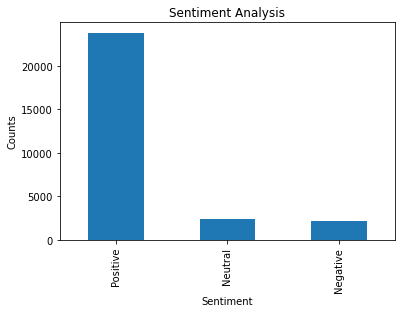

In [12]:
# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
analyzed_data['Sentiment'].value_counts().plot(kind='bar')
plt.show()

In [13]:
# extracting 500 positive, negative and neutral reviews for training sample
sample_train_positive = analyzed_data[analyzed_data.Sentiment == 'Positive'].iloc[:500]
sample_train_negative = analyzed_data[analyzed_data.Sentiment == 'Negative'].iloc[:500]
sample_train_neutral = analyzed_data[analyzed_data.Sentiment == 'Neutral'].iloc[:500]

In [14]:
# extracting 200 positive, negative and neutral reviews for testing sample
sample_test_positive = analyzed_data[analyzed_data.Sentiment == 'Positive'].iloc[500:700]
sample_test_negative = analyzed_data[analyzed_data.Sentiment == 'Negative'].iloc[500:700]
sample_test_neutral = analyzed_data[analyzed_data.Sentiment == 'Neutral'].iloc[500:700]

In [15]:
# combining the training samples and shuffling them
training_sample = pd.concat([sample_train_positive, sample_train_negative, sample_train_neutral]).sample(frac=1).reset_index(drop=True)

# .concat() combines the datasets
# .sample(frac=1) shuffles the dataset
# .reset_index(drop=True) resets the index of the dataset

In [16]:
# combining the testing samples and shuffling them
testing_sample = pd.concat([sample_test_positive, sample_test_negative, sample_test_neutral]).sample(frac=1).reset_index(drop=True)

In [17]:
# selecting the needed columns for training and testing samples
# review text , polarity, sentiment

# training sample
training_sample = training_sample[['reviews.text', 'Polarity', 'Sentiment']]

# testing sample
testing_sample = testing_sample[['reviews.text', 'Polarity', 'Sentiment']]

In [18]:
# Splitting the training sample into X_train and y_train
X_train = training_sample['reviews.text']
y_train = training_sample['Sentiment']

# Splitting the testing sample into X_test and y_test
X_test = testing_sample['reviews.text']
y_test = testing_sample['Sentiment']

#### Importing the required libraries for training and testing

In [19]:
# we will perform Naive Bayes, SVM, Random Forest and Logistic Regression on the dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Vectorizing the data

TfidfVectorizer is a class from the sklearn.feature_extraction.text module in Python that is used for text feature extraction. It converts a collection of raw text documents into a matrix of TF-IDF features.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which is a numerical statistic that reflects how important a word is to a document in a collection or corpus. The TF-IDF value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the corpus. This helps to adjust for the fact that some words appear more frequently in general and therefore may not be as informative as words that appear less frequently but are specific to the document.

The process of using TfidfVectorizer involves the following steps:

Creating an instance of TfidfVectorizer. By default, this class applies text preprocessing, tokenization, and stop word removal before generating the TF-IDF features.

Calling the fit_transform() method on the training data (X_train), which fits the vectorizer on the training data and transforms the training data into a matrix of TF-IDF features. The result is assigned to X_train.

Calling the transform() method on the test data (X_test), which applies the fitted vectorizer on the test data and transforms it into a matrix of TF-IDF features. The result is assigned to X_test.

The resulting X_train and X_test matrices are sparse matrices, where each row corresponds to a document and each column corresponds to a word in the vocabulary. The value in each cell represents the TF-IDF score of the word in that document.

The purpose of using TfidfVectorizer is to convert the text data into a numerical representation that can be used as input to machine learning models. By representing the text data as TF-IDF features, we can capture the important information about the text while ignoring less informative words. This can improve the accuracy of the machine learning models that use this representation as input.

In [20]:
# vectorizing the training and testing samples
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

#### Naive Bayes Classifier

In [21]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)
print('Naive Bayes Accuracy: ', accuracy_score(y_test, pred_nb))
print('Naive Bayes Classification Report: ', classification_report(y_test, pred_nb))
print('Naive Bayes Confusion Matrix: ', confusion_matrix(y_test, pred_nb))

Naive Bayes Accuracy:  0.6966666666666667
Naive Bayes Classification Report:                precision    recall  f1-score   support

    Negative       0.63      0.79      0.70       200
     Neutral       0.93      0.56      0.70       200
    Positive       0.65      0.75      0.69       200

    accuracy                           0.70       600
   macro avg       0.74      0.70      0.70       600
weighted avg       0.74      0.70      0.70       600

Naive Bayes Confusion Matrix:  [[157   6  37]
 [ 44 111  45]
 [ 48   2 150]]


#### Support Vector Machine

In [22]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
print('SVM Accuracy: ', accuracy_score(y_test, pred_svm))
print('SVM Classification Report: ', classification_report(y_test, pred_svm))
print('SVM Confusion Matrix: ', confusion_matrix(y_test, pred_svm))

SVM Accuracy:  0.695
SVM Classification Report:                precision    recall  f1-score   support

    Negative       0.68      0.56      0.62       200
     Neutral       0.67      0.86      0.75       200
    Positive       0.74      0.66      0.70       200

    accuracy                           0.69       600
   macro avg       0.70      0.69      0.69       600
weighted avg       0.70      0.69      0.69       600

SVM Confusion Matrix:  [[113  56  31]
 [ 13 173  14]
 [ 39  30 131]]


#### Random Forest Classifier

In [23]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print('Random Forest Accuracy: ', accuracy_score(y_test, pred_rf))
print('Random Forest Classification Report: ', classification_report(y_test, pred_rf))
print('Random Forest Confusion Matrix: ', confusion_matrix(y_test, pred_rf))

Random Forest Accuracy:  0.715
Random Forest Classification Report:                precision    recall  f1-score   support

    Negative       0.67      0.67      0.67       200
     Neutral       0.72      0.85      0.78       200
    Positive       0.77      0.62      0.69       200

    accuracy                           0.71       600
   macro avg       0.72      0.71      0.71       600
weighted avg       0.72      0.71      0.71       600

Random Forest Confusion Matrix:  [[134  42  24]
 [ 16 171  13]
 [ 51  25 124]]


#### Logistic Regression

In [24]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print('Logistic Regression Accuracy: ', accuracy_score(y_test, pred_lr))
print('Logistic Regression Classification Report: ', classification_report(y_test, pred_lr))
print('Logistic Regression Confusion Matrix: ', confusion_matrix(y_test, pred_lr))

Logistic Regression Accuracy:  0.775
Logistic Regression Classification Report:                precision    recall  f1-score   support

    Negative       0.78      0.69      0.73       200
     Neutral       0.74      0.92      0.82       200
    Positive       0.83      0.71      0.77       200

    accuracy                           0.78       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.78      0.78      0.77       600

Logistic Regression Confusion Matrix:  [[138  40  22]
 [  8 184   8]
 [ 32  25 143]]


### Training and Testing on the entire dataset with ensemble model

In [25]:
# Extract 2100 positive, negative and neutral reviews from analyzed_data
positive_data = analyzed_data[analyzed_data.Sentiment == 'Positive'].iloc[:2100]
negative_data = analyzed_data[analyzed_data.Sentiment == 'Negative'].iloc[:2100]
neutral_data = analyzed_data[analyzed_data.Sentiment == 'Neutral'].iloc[:2100]

# Combine the positive, negative and neutral reviews into a single dataset
final_data = pd.concat([positive_data, negative_data, neutral_data]).sample(frac=1).reset_index(drop=True)

# Make training and testing splits
from sklearn.model_selection import train_test_split
X = final_data['reviews.text']
y = final_data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Ensemble model creation

In [26]:
# Vectorize the training and testing samples
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [27]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('nb', nb), ('svm', svm), ('rf', rf), ('lr', lr)], voting='hard')
# voting='hard' means majority voting is used to predict the class labels
# voting='soft' means the predicted class label for a sample is the one with the highest probability

# estimator=[('nb', nb), ('svm', svm), ('rf', rf), ('lr', lr)] means the estimators used for majority voting are Naive Bayes, SVM, Random Forest and Logistic Regression

# Fitting the model
voting_clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = voting_clf.predict(X_test)
accuracy = voting_clf.score(X_test, y_test)

# Accuracy
print('Voting Classifier Accuracy: ', accuracy)
print('Voting Classifier Accuracy: ', accuracy_score(y_test, y_pred))
print('Voting Classifier Classification Report: ', classification_report(y_test, y_pred))
print('Voting Classifier Confusion Matrix: ', confusion_matrix(y_test, y_pred))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy:  0.8928571428571429
Voting Classifier Accuracy:  0.8928571428571429
Voting Classifier Classification Report:                precision    recall  f1-score   support

    Negative       0.84      0.93      0.88       420
     Neutral       0.89      0.90      0.90       427
    Positive       0.95      0.85      0.90       413

    accuracy                           0.89      1260
   macro avg       0.90      0.89      0.89      1260
weighted avg       0.90      0.89      0.89      1260

Voting Classifier Confusion Matrix:  [[389  22   9]
 [ 34 385   8]
 [ 38  24 351]]


### Loading new dataset with customer Ids and reviews

In [28]:
new_cust_unanalyzed_df = pd.read_csv('Reviews.csv')

In [29]:
new_cust_unanalyzed_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Determining Sentiment using the TextBlob library

In [30]:
# Adding new columns to the new_cust_unanalyzed_df - Subjectivity and Polarity - Takes around 15 minutes to run
# Using the textblob library to calculate the subjectivity and polarity of each review
new_cust_unanalyzed_df['Subjectivity'] = new_cust_unanalyzed_df['Text'].apply(getSubjectivity)
new_cust_unanalyzed_df['Polarity'] = new_cust_unanalyzed_df['Text'].apply(getPolarity)

In [31]:
# Adding new column to the new_cust_unanalyzed_df - Sentiment
# Sentiment is calculated based on the Polarity column which is calculated using the textblob library
new_cust_unanalyzed_df['Sentiment_using_Textblob'] = new_cust_unanalyzed_df['Polarity'].apply(getSentiment)

#### Determining Sentiment using the ensemble model

In [32]:
# use the ensemble model to predict the sentiment of the new customer reviews - Takes around 10 minutes to run
# Now using the ensemble model to predict the sentiment of the new customer reviews
new_cust_unanalyzed_df['Sentiment_using_EnsembleModel'] = voting_clf.predict(cv.transform(new_cust_unanalyzed_df['Text']))

# cv.transform(new_cust_unanalyzed_df['Text']) - this is used to vectorize the new customer reviews using the CountVectorizer object cv that we created earlier

In [33]:
new_cust_unanalyzed_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Subjectivity,Polarity,Sentiment_using_Textblob,Sentiment_using_EnsembleModel
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.433333,0.450000,Positive,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.762963,-0.033333,Negative,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.448571,0.133571,Positive,Negative
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.533333,0.166667,Positive,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.637500,0.483333,Positive,Positive


In [34]:
# save the new_cust_unanalyzed_df to new_cust_analyzed_df csv file - Intermediate checkpoint
new_cust_unanalyzed_df.to_csv('new_cust_bothAnalyzed_df.csv', index=False)

In [35]:
# Get the analyzed data from the csv file if already saved
new_cust_analyzed_df = pd.read_csv('new_cust_bothAnalyzed_df.csv')

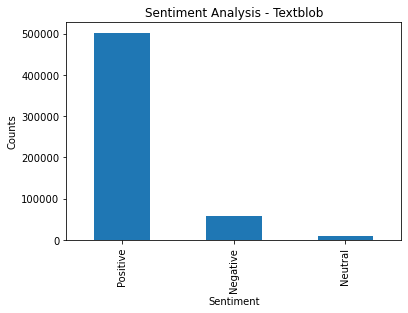

In [36]:
plt.title('Sentiment Analysis - Textblob')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
new_cust_analyzed_df['Sentiment_using_Textblob'].value_counts().plot(kind='bar')
plt.show()

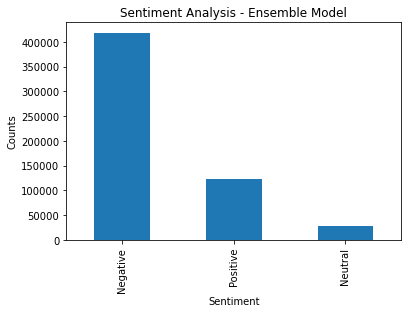

In [37]:
plt.title('Sentiment Analysis - Ensemble Model')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
new_cust_analyzed_df['Sentiment_using_EnsembleModel'].value_counts().plot(kind='bar')
plt.show()

In [38]:
new_cust_analyzed_df['Sentiment_using_Textblob'].value_counts()

Positive    502016
Negative     58051
Neutral       8387
Name: Sentiment_using_Textblob, dtype: int64

In [39]:
new_cust_analyzed_df['Sentiment_using_EnsembleModel'].value_counts()

Negative    418258
Positive    122697
Neutral      27499
Name: Sentiment_using_EnsembleModel, dtype: int64

In [40]:
new_cust_analyzed_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Subjectivity,Polarity,Sentiment_using_Textblob,Sentiment_using_EnsembleModel
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.433333,0.450000,Positive,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.762963,-0.033333,Negative,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.448571,0.133571,Positive,Negative
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.533333,0.166667,Positive,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.637500,0.483333,Positive,Positive


In [41]:
# testing the Sentiment_using_EnsembleModel column against the Sentiment_using_Textblob column

# Accuracy
print('Accuracy: ', accuracy_score(new_cust_analyzed_df['Sentiment_using_Textblob'], new_cust_analyzed_df['Sentiment_using_EnsembleModel']))

Accuracy:  0.31700718088007124


#### Creating a new dataframe with customer Ids and other relevant columns

In [42]:
# Extracting all unique user ids from the analyzed data
user_ids = new_cust_analyzed_df['UserId'].unique()

In [43]:
user_ids.shape

(256059,)

In [44]:
# creating a new customer dataframe with unique user ids
customer_df= pd.DataFrame(user_ids, columns=['UserId'])
customer_df

,UserId
0,A3SGXH7AUHU8GW
1,A1D87F6ZCVE5NK
2,ABXLMWJIXXAIN
3,A395BORC6FGVXV
4,A1UQRSCLF8GW1T
...,...
256054,A2SD7TY3IOX69B
256055,A2P9W8T7NTLG2Z
256056,A28KG5XORO54AY
256057,A121AA1GQV751Z


In [45]:
# Calculating total frequency and average polarity for each user
grouped_data = new_cust_analyzed_df.groupby('UserId').agg({'UserId': 'count', 'Polarity': 'mean'})
grouped_data.columns = ['total_frequency', 'average_polarity']
customer_df = customer_df.merge(grouped_data, on='UserId')

In [46]:
customer_df

,UserId,total_frequency,average_polarity
0,A3SGXH7AUHU8GW,1,0.450000
1,A1D87F6ZCVE5NK,1,-0.033333
2,ABXLMWJIXXAIN,3,0.321396
3,A395BORC6FGVXV,3,0.166667
4,A1UQRSCLF8GW1T,2,0.462500
...,...,...,...
256054,A2SD7TY3IOX69B,1,0.041667
256055,A2P9W8T7NTLG2Z,1,0.110714
256056,A28KG5XORO54AY,1,0.365000
256057,A121AA1GQV751Z,1,-0.021875


In [47]:
# Adding an average sentiment column to the customer_df
customer_df['average_sentiment'] = customer_df['average_polarity'].apply(getSentiment)
customer_df.head()

,UserId,total_frequency,average_polarity,average_sentiment
0,A3SGXH7AUHU8GW,1,0.450000,Positive
1,A1D87F6ZCVE5NK,1,-0.033333,Negative
2,ABXLMWJIXXAIN,3,0.321396,Positive
3,A395BORC6FGVXV,3,0.166667,Positive
4,A1UQRSCLF8GW1T,2,0.462500,Positive


In [48]:
customer_df['average_sentiment'].value_counts()

Positive    226261
Negative     25834
Neutral       3964
Name: average_sentiment, dtype: int64

In [49]:
# Adding column for last time user made a review
last_review = new_cust_analyzed_df.groupby('UserId')['Time'].max()
customer_df = customer_df.merge(last_review, on='UserId')
customer_df.columns = ['UserId', 'total_frequency', 'average_polarity', 'average_sentiment', 'last_review']


In [50]:
customer_df.head()

,UserId,total_frequency,average_polarity,average_sentiment,last_review
0,A3SGXH7AUHU8GW,1,0.450000,Positive,1303862400
1,A1D87F6ZCVE5NK,1,-0.033333,Negative,1346976000
2,ABXLMWJIXXAIN,3,0.321396,Positive,1351209600
3,A395BORC6FGVXV,3,0.166667,Positive,1307923200
4,A1UQRSCLF8GW1T,2,0.462500,Positive,1350777600


In [51]:
# importing datetime module to handle last_review column
from datetime import datetime, timedelta

In [52]:
# Converting last_review column to datetime objects
customer_df['last_review'] = pd.to_datetime(customer_df['last_review'], unit='s')

In [53]:
customer_df.head()

,UserId,total_frequency,average_polarity,average_sentiment,last_review
0,A3SGXH7AUHU8GW,1,0.450000,Positive,2011-04-27
1,A1D87F6ZCVE5NK,1,-0.033333,Negative,2012-09-07
2,ABXLMWJIXXAIN,3,0.321396,Positive,2012-10-26
3,A395BORC6FGVXV,3,0.166667,Positive,2011-06-13
4,A1UQRSCLF8GW1T,2,0.462500,Positive,2012-10-21


In [54]:
# Calculating the duration from the current time
from datetime import datetime, timedelta
current_time = datetime.now()
new_time = current_time - timedelta(days=365*10)
customer_df['duration'] = new_time - customer_df['last_review']

In [55]:
customer_df.head()

,UserId,total_frequency,average_polarity,average_sentiment,last_review,duration
0,A3SGXH7AUHU8GW,1,0.450000,Positive,2011-04-27,738 days 15:56:23.086920
1,A1D87F6ZCVE5NK,1,-0.033333,Negative,2012-09-07,239 days 15:56:23.086920
2,ABXLMWJIXXAIN,3,0.321396,Positive,2012-10-26,190 days 15:56:23.086920
3,A395BORC6FGVXV,3,0.166667,Positive,2011-06-13,691 days 15:56:23.086920
4,A1UQRSCLF8GW1T,2,0.462500,Positive,2012-10-21,195 days 15:56:23.086920


In [56]:
# Computing statistics on the duration column
duration_stats = customer_df['duration'].describe()

# Print the statistics
print('Minimum duration:', duration_stats['min'])
print('Maximum duration:', duration_stats['max'])
print('Standard deviation of duration:', duration_stats['std'])

Minimum duration: 190 days 15:56:23.086920
Maximum duration: 4957 days 15:56:23.086920
Standard deviation of duration: 554 days 23:05:59.508162488


In [57]:
# adding a new column for customer status based on duration - active, sleep, unactive
# less than 2 years - active
# between 2 and 3.5 years - sleep
# more than 3.5 years - unactive
customer_df['customer_status'] = customer_df['duration'].apply(lambda x: 'active' if x < timedelta(days=730) else ('sleep' if x < timedelta(days=1277) else 'unactive'))

In [58]:
customer_df.head()

,UserId,total_frequency,average_polarity,average_sentiment,last_review,duration,customer_status
0,A3SGXH7AUHU8GW,1,0.450000,Positive,2011-04-27,738 days 15:56:23.086920,sleep
1,A1D87F6ZCVE5NK,1,-0.033333,Negative,2012-09-07,239 days 15:56:23.086920,active
2,ABXLMWJIXXAIN,3,0.321396,Positive,2012-10-26,190 days 15:56:23.086920,active
3,A395BORC6FGVXV,3,0.166667,Positive,2011-06-13,691 days 15:56:23.086920,active
4,A1UQRSCLF8GW1T,2,0.462500,Positive,2012-10-21,195 days 15:56:23.086920,active


In [59]:
customer_df['customer_status'].value_counts()

active      150017
sleep        61795
unactive     44247
Name: customer_status, dtype: int64

#### Visualizing the customer data on their activity status

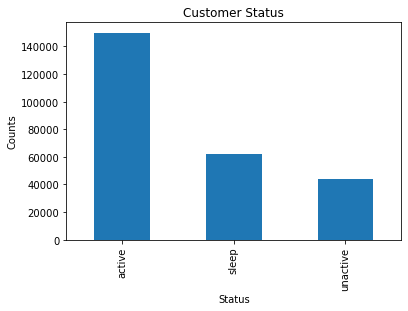

In [60]:
# Bar plot
plt.title('Customer Status')
plt.xlabel('Status')
plt.ylabel('Counts')
customer_df['customer_status'].value_counts().plot(kind='bar')
plt.show()

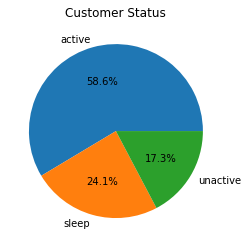

In [61]:
# Pie chart
plt.title('Customer Status')
plt.pie(customer_df['customer_status'].value_counts(), labels=['active', 'sleep', 'unactive'], autopct='%1.1f%%')
plt.show()

#### # Visualizing the average sentiment

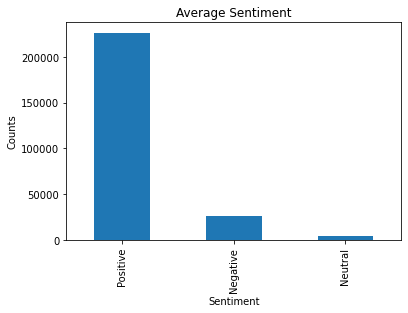

In [62]:
# Bar plot
plt.title('Average Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
customer_df['average_sentiment'].value_counts().plot(kind='bar')
plt.show()

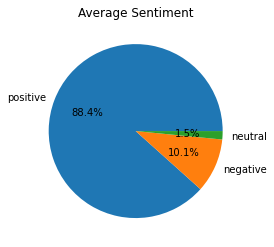

In [63]:
# Pie chart
plt.title('Average Sentiment')
plt.pie(customer_df['average_sentiment'].value_counts(), labels=['positive', 'negative', 'neutral'], autopct='%1.1f%%')
plt.show()

In [66]:
# saving the customer_df to a csv file
customer_df.to_csv('customer_df.csv', index=False)